<a href="https://colab.research.google.com/github/Rakshanax/Hashtags-and-Image-Recommendation/blob/main/CIP_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import nltk
nltk.download('all')

In [ ]:
!pip install pexels_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re   #re = regular expression
import string
import math
from collections import Counter
from pexels_api import API
from PIL import Image
import requests
import shutil
from io import BytesIO

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/TweetsDatasetFinal.csv")
print(data)

          id                                 message to examine  \
0          1                         @markhardy1974 Me too  itm   
1          2  @machineplay I'm so sorry you're having to go ...   
2          3  I activated my Selfcontrol block early, meanin...   
3          4  @goodlaura What about Reese dying on TTSC? And...   
4          5   My man crush Jake Peavy let me down  gayforpeavy   
...      ...                                                ...   
21325  21326  Thanks for followfriday   @GfWarrior @Authorof...   
21326  21327  @rapidbi followsabbath because he sends out co...   
21327  21328  @cc_chapman Re your retweet about who 2 follow...   
21328  21329  @EstrellaBella10 Looks like someone read the h...   
21329  21330  followfriday because he is as sick in the head...   

                        hashtags  
0                       ['#itm']  
1               ['#therapyfail']  
2                        ['#fb']  
3               ['#TTSC', '#24']  
4               ['#g

# DATA PREPROCESSING

**CHARACTER NORMALIZATION**

**CASE CONVERSION**

In [ ]:
data['message to examine'] = data['message to examine'].str.lower()
data['hashtags'] = data['hashtags'].str.lower()
print(data)

          id                                 message to examine  \
0          1                         @markhardy1974 me too  itm   
1          2  @machineplay i'm so sorry you're having to go ...   
2          3  i activated my selfcontrol block early, meanin...   
3          4  @goodlaura what about reese dying on ttsc? and...   
4          5   my man crush jake peavy let me down  gayforpeavy   
...      ...                                                ...   
21325  21326  thanks for followfriday   @gfwarrior @authorof...   
21326  21327  @rapidbi followsabbath because he sends out co...   
21327  21328  @cc_chapman re your retweet about who 2 follow...   
21328  21329  @estrellabella10 looks like someone read the h...   
21329  21330  followfriday because he is as sick in the head...   

                        hashtags  
0                       ['#itm']  
1               ['#therapyfail']  
2                        ['#fb']  
3               ['#ttsc', '#24']  
4               ['#g

**FILTRATION**

**URL Removal**

In [ ]:
data['message to examine'] = data['message to examine'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')
data['message to examine'] = data['message to examine'].str.replace('[a-z]+.com([/]?[a-z]*)*','')
print(data)

          id                                 message to examine  \
0          1                         @markhardy1974 me too  itm   
1          2  @machineplay i'm so sorry you're having to go ...   
2          3  i activated my selfcontrol block early, meanin...   
3          4  @goodlaura what about reese dying on ttsc? and...   
4          5   my man crush jake peavy let me down  gayforpeavy   
...      ...                                                ...   
21325  21326  thanks for followfriday   @gfwarrior @authorof...   
21326  21327  @rapidbi followsabbath because he sends out co...   
21327  21328  @cc_chapman re your retweet about who 2 follow...   
21328  21329  @estrellabella10 looks like someone read the h...   
21329  21330  followfriday because he is as sick in the head...   

                        hashtags  
0                       ['#itm']  
1               ['#therapyfail']  
2                        ['#fb']  
3               ['#ttsc', '#24']  
4               ['#g

<ipython-input-11-a9fb1c6ddf01>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['message to examine'] = data['message to examine'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')
<ipython-input-11-a9fb1c6ddf01>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['message to examine'] = data['message to examine'].str.replace('[a-z]+.com([/]?[a-z]*)*','')


**Stop word Removal**

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop = stopwords.words('english')
data['message to examine'] = data['message to examine'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
print(data['message to examine'])

0                                       @markhardy1974 itm
1        @machineplay i'm sorry go this. again. therapy...
2        activated selfcontrol block early, meaning can...
3        @goodlaura reese dying ttsc? season finale nex...
4                     man crush jake peavy let gayforpeavy
                               ...                        
21325    thanks followfriday @gfwarrior @authorofpatche...
21326    @rapidbi followsabbath sends cool stuff..hurry...
21327    @cc_chapman retweet 2 follow that's great thin...
21328    @estrellabella10 looks like someone read handb...
21329    followfriday sick head (and whining get tagged...
Name: message to examine, Length: 21330, dtype: object


**Punctuation Stripping**

In [ ]:
data['message to examine'] = data['message to examine'].str.replace(r"[\"\'\!\(\)\-\[\]\{\}\;\:\\\,\<\>\.\/\?\#\$\%\^&\*\_\~]",'')
print(data)

          id                                 message to examine  \
0          1                                 @markhardy1974 itm   
1          2    @machineplay im sorry go this again therapyfail   
2          3  activated selfcontrol block early meaning cant...   
3          4  @goodlaura reese dying ttsc season finale next...   
4          5               man crush jake peavy let gayforpeavy   
...      ...                                                ...   
21325  21326  thanks followfriday @gfwarrior @authorofpatche...   
21326  21327  @rapidbi followsabbath sends cool stuffhurry s...   
21327  21328  @ccchapman retweet 2 follow thats great things...   
21328  21329  @estrellabella10 looks like someone read handb...   
21329  21330  followfriday sick head and whining get tagged ...   

                        hashtags  
0                       ['#itm']  
1               ['#therapyfail']  
2                        ['#fb']  
3               ['#ttsc', '#24']  
4               ['#g

<ipython-input-17-6af18d573fa9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['message to examine'] = data['message to examine'].str.replace(r"[\"\'\!\(\)\-\[\]\{\}\;\:\\\,\<\>\.\/\?\#\$\%\^&\*\_\~]",'')


**Digit Removal**

In [ ]:
data['message to examine'] = data['message to examine'].str.replace(r'[0-9]','')
print(data)

          id                                 message to examine  \
0          1                                     @markhardy itm   
1          2    @machineplay im sorry go this again therapyfail   
2          3  activated selfcontrol block early meaning cant...   
3          4  @goodlaura reese dying ttsc season finale next...   
4          5               man crush jake peavy let gayforpeavy   
...      ...                                                ...   
21325  21326  thanks followfriday @gfwarrior @authorofpatche...   
21326  21327  @rapidbi followsabbath sends cool stuffhurry s...   
21327  21328  @ccchapman retweet  follow thats great things ...   
21328  21329  @estrellabella looks like someone read handboo...   
21329  21330  followfriday sick head and whining get tagged ...   

                        hashtags  
0                       ['#itm']  
1               ['#therapyfail']  
2                        ['#fb']  
3               ['#ttsc', '#24']  
4               ['#g

<ipython-input-19-c47fc06452ed>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['message to examine'] = data['message to examine'].str.replace(r'[0-9]','')


In [ ]:
data.to_csv('/content/gdrive/My Drive/Preprocessed.csv', index=False)

# FUNCTION ENHANCEMENT

**TWEETS SIMILARITY**

In [ ]:
#Computing Inverse Document Frequency (IDF) score for all the words in the tweet

In [ ]:
def similar_tweets(t):

  #splitting the tweet into words
  words = t.split()

  #finding unique words and storing in a dictionary 
  unique = {}
  for word in words:
      if word not in unique.keys():
          unique[word] = 0
  # print ("\nInitial dictionary\n", unique)

  #counting the frequency of each word in the dictionary
  for term in unique.keys():
    for i in range(len(data['message to examine'])):
      if term in data.iat[i,1]:
        #increment number of documents with the term in it
        unique[term] +=1 
    #idf score = log(Total number of documents / Number of documents with the term in it)
    idf_score = math.log(len(data['message to examine'])/unique[term]) 
    unique[term] = idf_score
  # print("\nDictionary with updated idf_scores\n", unique)

  #sorting the dictionary according to highest idf_score
  value_key_pairs = ((value, key) for (key,value) in unique.items())
  sorted_value_key_pairs = sorted(value_key_pairs, reverse=True)  
  unique = {k: v for v, k in sorted_value_key_pairs}

  # print("\nSorted dictionary\n", unique)
  similarTweets = pd.DataFrame()

  #retreiving tweets with any of the top 3 scoring words
  for x in range(3):
    tempDf = data[data['message to examine'].str.contains(list(unique)[x])]
    similarTweets = pd.concat([similarTweets,tempDf]).drop_duplicates(keep='first')
  # print(similarTweets)
  return similarTweets

In [ ]:
#use this format and iterate through the dataframe 
tweet = str(data.iat[8,1])
print(tweet)
narrowedTweets = similar_tweets(tweet)
print("\nNARROWED TWEETS\n", narrowedTweets)

im way late working client  fb

NARROWED TWEETS
           id                                 message to examine  \
8          9                     im way late working client  fb   
591      592  tweetie mac awesome best twitter client far mi...   
1699    1700       @jvbbd hello jan see quotclient kquot zs you   
1922    1923  adium beta supports irc twitter irc client wor...   
2156    2157  ff wish could spare time clients need me im sorry   
...      ...                                                ...   
20661  20662  stavros flately bgt = amazing lovely relations...   
20795  20796  liesgirlstell want date anyone right now maybe...   
20860  20861  followfriday week @gracesmith  always posting ...   
21058  21059  @nazra return followfriday buzz later tonight ...   
21253  21254  followfriday @weirdralph @tepherguy @getbender...   

                    hashtags  
8                    ['#fb']  
591                ['#lomo']  
1699      ['#3turnoffwords']  
1922   ['#twitter', '#

In [ ]:
narrowedTweets.to_csv('/content/gdrive/My Drive/Narrowed.csv', index=False)

**TOKEN WEIGHTS**

In [ ]:
#Computing the weight of the words in the tweets

In [ ]:
def weight_tweets(tweet):
  weighted_words = []
  weighted_tweet = []
  weighted_arr = []
  for x in range(len(tweet['message to examine'])):
    words = tweet.iat[x,1].split()
    for word in words:
      if '@' in word:
        weight = 3
      else:
        weight = 1
        l = len(word)
        weight += l*0.1    
      weighted_words.append((word, weight))
      #print(weighted_words)
    weighted_tweet.append(weighted_words)
    #print("Weighted tweet\n", weighted_tweet)
    weighted_arr.append(weighted_tweet)
    #print("Array\n",weighted_arr)
  return weighted_tweet

In [ ]:
#weighted_tokens = weight_tweets(str(data.iat[7,1]))
weighted_tokens = weight_tweets(narrowedTweets)
print(weighted_tokens[0])

[('im', 1.2), ('way', 1.3), ('late', 1.4), ('working', 1.7000000000000002), ('client', 1.6), ('fb', 1.2), ('tweetie', 1.7000000000000002), ('mac', 1.3), ('awesome', 1.7000000000000002), ('best', 1.4), ('twitter', 1.7000000000000002), ('client', 1.6), ('far', 1.3), ('missing', 1.7000000000000002), ('client', 1.6), ('linux', 1.5), ('@jvbbd', 3), ('hello', 1.5), ('jan', 1.3), ('see', 1.3), ('quotclient', 2.0), ('kquot', 1.5), ('zs', 1.2), ('you', 1.3), ('adium', 1.5), ('beta', 1.4), ('supports', 1.8), ('irc', 1.3), ('twitter', 1.7000000000000002), ('irc', 1.3), ('client', 1.6), ('working', 1.7000000000000002), ('twitter', 1.7000000000000002), ('client', 1.6), ('yet', 1.3), ('ff', 1.2), ('wish', 1.4), ('could', 1.5), ('spare', 1.5), ('time', 1.4), ('clients', 1.7000000000000002), ('need', 1.4), ('me', 1.2), ('im', 1.2), ('sorry', 1.5), ('@dwhelan', 3), ('ive', 1.3), ('wondered', 1.8), ('rake', 1.4), ('to', 1.2), ('client', 1.6), ('made', 1.4), ('clear', 1.5), ('net', 1.3), ('only', 1.4), (

# FEATURE OPTIMIZATION

In [ ]:
#In python, hashmaps are implemented as dictionaries.
#In dictionaries, the items are stored as key-value paits where keys are unique.
#Curly braces are used to create dictionaries

In [ ]:
dataFrame1 = pd.DataFrame(narrowedTweets['hashtags']);
print("Contents of the hashtags DataFrame:");
print(dataFrame1);

Contents of the hashtags DataFrame:
                    hashtags
8                    ['#fb']
591                ['#lomo']
1699      ['#3turnoffwords']
1922   ['#twitter', '#fail']
2156            ['#lofnotc']
...                      ...
20661                 ['#1']
20795         ['#jonaslive']
20860      ['#followfriday']
21058      ['#followfriday']
21253      ['#followfriday']

[728 rows x 1 columns]


In [ ]:
#Convert the DataFrame to Series
hashtag_index = dataFrame1.to_dict();
print("DataFrame as a dictionary:");
print(hashtag_index);

DataFrame as a dictionary:
{'hashtags': {8: "['#fb']", 591: "['#lomo']", 1699: "['#3turnoffwords']", 1922: "['#twitter', '#fail']", 2156: "['#lofnotc']", 2655: "['#fartingloud']", 3562: "['#ttl']", 4363: "['#mcrchat']", 4947: "['#fb']", 4951: "['#musicmonday']", 4998: "['#fb']", 5141: "['#2']", 5191: "['#2']", 5215: "['#dodgers']", 6534: "['#f1']", 7834: "['#iremember']", 7854: "['#squarespace']", 7871: "['#cakephp']", 8097: "['#fm07']", 9183: "['#adobecs4']", 10241: "['#squarespace']", 10971: "['#tfc']", 11488: "['#awesomehr']", 11524: "['#glasto']", 11628: "['#etsy']", 11931: "['#pixar']", 12353: "['#rafa']", 12900: "['#fb']", 13664: "['#tuf']", 14159: "['#squarespace']", 14707: "['#cakefest', '#cakephp']", 14945: "['#cmim']", 16044: "['#jomsocial']", 16101: "['#vista', '#fail']", 16556: "['#podcast']", 17899: "['#banksy', '#coca']", 18475: "['#everyonebutton']", 19090: "['#vs10']", 19229: "['#lomo', '#lomography']", 19481: "['#followfriday']", 19834: "['#coffeeclub']", 19854: "['#fo

In [ ]:
dataFrame2 = pd.DataFrame(weighted_tokens[0]);
print("Contents of the words DataFrame:");
print(dataFrame2);

Contents of the words DataFrame:
                 0    1
0               im  1.2
1              way  1.3
2             late  1.4
3          working  1.7
4           client  1.6
...            ...  ...
7666  @ericatwitts  3.0
7667   interesting  2.1
7668         andor  1.5
7669         funny  1.5
7670         later  1.5

[7671 rows x 2 columns]


In [ ]:
#Convert the DataFrame to Series
word_index = dataFrame2.to_dict();
print("DataFrame as a dictionary:");
print(word_index);

DataFrame as a dictionary:
{0: {0: 'im', 1: 'way', 2: 'late', 3: 'working', 4: 'client', 5: 'fb', 6: 'tweetie', 7: 'mac', 8: 'awesome', 9: 'best', 10: 'twitter', 11: 'client', 12: 'far', 13: 'missing', 14: 'client', 15: 'linux', 16: '@jvbbd', 17: 'hello', 18: 'jan', 19: 'see', 20: 'quotclient', 21: 'kquot', 22: 'zs', 23: 'you', 24: 'adium', 25: 'beta', 26: 'supports', 27: 'irc', 28: 'twitter', 29: 'irc', 30: 'client', 31: 'working', 32: 'twitter', 33: 'client', 34: 'yet', 35: 'ff', 36: 'wish', 37: 'could', 38: 'spare', 39: 'time', 40: 'clients', 41: 'need', 42: 'me', 43: 'im', 44: 'sorry', 45: '@dwhelan', 46: 'ive', 47: 'wondered', 48: 'rake', 49: 'to', 50: 'client', 51: 'made', 52: 'clear', 53: 'net', 54: 'only', 55: 'force', 56: 'devs', 57: 'learn', 58: 'new', 59: 'lang', 60: 'agile', 61: 'ccnet', 62: 'wondering', 63: 'ubuntu', 64: 'ships', 65: 'borked', 66: 'tsclient', 67: 'ok', 68: 'changing', 69: 'mind', 70: 'twitter', 71: 'clients', 72: 'think', 73: 'ill', 74: 'use', 75: 'destroy

# TAG GENERATION



**NAIVE BAYES CLASSIFIER**

In [ ]:
def wordweight(word):
      if '@' in word:
        weight = 3
      else:
        weight = 1
        l = len(word)
        weight += l*0.1 
      return weight  

In [ ]:
def nbclassify(tweet):
  temp = similar_tweets(tweet)
  T = temp.loc[:,['id','message to examine']]
  H = temp.loc[:,['id','hashtags']]
  classifications = []
  W = tweet.split()
  for t,i in zip(T['message to examine'],T['id']):
    wordtemp = t.split()
    hashtag = H.loc[i-1, 'hashtags']  
    hashtagslist = hashtag.strip("[]").split(", ")
    for h in hashtagslist:
      score = 0
      for w in W:
        if w in wordtemp:
          score += prob(w,T,H) * wordweight(w)
      classifications.append([h,score])    
  print("\nCLASSIFICATIONS:\n",classifications)
  classif = getHighestScores(classifications, 3)
  print("\nTop Hashtags : \n",classif)
  return classif


# Function to calculate the probability 
def prob(w,T,H):
  total = 0
  hash = {}
  for t,i in zip(T['message to examine'], T['id']):
    wordtemp = t.split()
    if w in wordtemp:
      tweethashtag = H.loc[i-1, 'hashtags'] 
      hashtags_list = tweethashtag.strip("[]").split(", ")
      total += len(hashtags_list)   #total number of hashtags in the similar tweets
      for h in hashtags_list:
        if h not in hash:
          hash[h]=1
  nhw=len(hash)
  probabilty = nhw/total
  return (probabilty)

# Function to get K items with highest score
def getHighestScores(cls, k):
  return sorted(cls, key=lambda x: x[1], reverse=True)[:k]

In [ ]:
tweet = str(data.iat[8,1])
print(tweet)
hashtagsGenerated = nbclassify(tweet)

im way late working client  fb

CLASSIFICATIONS:
 [["'#fb'", 6.645867336133156], ["'#lomo'", 1.2800000000000002], ["'#3turnoffwords'", 0], ["'#twitter'", 2.4548407643312107], ["'#fail'", 2.4548407643312107], ["'#lofnotc'", 0.8783505154639174], ["'#fartingloud'", 1.2800000000000002], ["'#ttl'", 0], ["'#mcrchat'", 0], ["'#fb'", 0], ["'#musicmonday'", 0], ["'#fb'", 1.2800000000000002], ["'#2'", 1.2800000000000002], ["'#2'", 0], ["'#dodgers'", 1.2800000000000002], ["'#f1'", 1.2800000000000002], ["'#iremember'", 1.2800000000000002], ["'#squarespace'", 1.2800000000000002], ["'#cakephp'", 0], ["'#fm07'", 1.2800000000000002], ["'#adobecs4'", 2.1583505154639178], ["'#squarespace'", 2.192676056338028], ["'#tfc'", 1.2800000000000002], ["'#awesomehr'", 1.2800000000000002], ["'#glasto'", 0], ["'#etsy'", 1.2800000000000002], ["'#pixar'", 1.2800000000000002], ["'#rafa'", 1.2800000000000002], ["'#fb'", 1.1748407643312102], ["'#tuf'", 1.2800000000000002], ["'#squarespace'", 1.2800000000000002], ["'#cak

**KNN CLASSIFIER**

In [ ]:
def column(matrix, i):
  return [row[i] for row in matrix]


def knnclassify(tweet): 
  T = similar_tweets(tweet).loc[:,['id','message to examine']]
  H = similar_tweets(tweet).loc[:,['id','hashtags']]
  print("No of similar tweets : ",len(T))

  W = tweet.split()
  neighbours = []

  # Calculate scores for each tweet in the similar tweets list
  for t,i in zip(T['message to examine'],T['id']):
    score = 0
    wordstemp = t.split()
    for w in W:
      if w in wordstemp:
        score += tcor(w,T,H) * wordweight(w)
    if score != 0:
      neighbours.append([i,t,score])
  print("\nNeighbours:\n", neighbours)
  print("\nNo of neighbours : ",len(neighbours))

  #Get K tweets with highest_scores
  nearest_neighbours = getHighestScores(neighbours, 30) #k=30
  print("\nNearest_neighbors:\n",nearest_neighbours)
  print("\nNo of nearest neighbours : ",len(nearest_neighbours),"\n")
  
  # Map hashtags to count
  classifications = { }
  for t,i in zip(column(nearest_neighbours,1),column(nearest_neighbours,0)):
    hashtag = H.loc[i-1, 'hashtags']
    hashtagslist = hashtag.strip("[]").split(", ")
    for h in hashtagslist:
      if h in classifications:
        classifications[h]+=1
      else:
        classifications[h]=1
  print("\n",classifications)

  #get top hashtags
  classifications = getHighestScores(classifications.items(), 3) #n=3 hashtags
  print("\nTop Hashtags : \n",classifications)


def tcor(w,T,H):
  TotalWordsCount=0
  WordTweetCount=0
  hash = {}
  for t,i in zip(T['message to examine'], T['id']):
    wordtemp = t.split()
    TotalWordsCount+=len(wordtemp)
    WordTweetCount+=wordtemp.count(w)
    if w in wordtemp:
      tweethashtag = H.loc[i-1, 'hashtags'] 
      hashtags_list = tweethashtag.strip("[]").split(", ")
      for h in hashtags_list:
        if h not in hash:
          hash[h]=1
  #number of hashtags the word co-occurs with
  cw=len(hash)
  #average number of words in Tweets containing the word
  fl = WordTweetCount/TotalWordsCount
  tcor_score = ((1/fl)+(1/cw))/2
  return(tcor_score)


# Function to get K items with highest score
def getHighestScores(neighbours, k):
  return sorted(neighbours, key=lambda x: x[1], reverse=True)[:k]

In [ ]:
tweet = str(data.iat[8,1])
print(tweet)
knnclassify(tweet)

im way late working client  fb
No of similar tweets :  728

Neighbours:
 [[9, 'im way late working client  fb', 793.2112458656957], [592, 'tweetie mac awesome best twitter client far missing client linux', 180.52268907563024], [1923, 'adium beta supports irc twitter irc client working twitter client yet', 206.71275070463474], [2157, 'ff wish could spare time clients need me im sorry', 56.137718996908276], [2656, '@dwhelan ive wondered rake to client made clear net only force devs learn new lang agile ccnet', 180.52268907563024], [4999, 'client  passed away early morning believe allows go home several beer high balls', 180.52268907563024], [5142, 'free email client nokia phones must handle hotmail flurrymail goes offline week lazyweb', 180.52268907563024], [5216, 'trying manipulate data directly db sugarcrm client happy jan', 180.52268907563024], [6535, '@daylightgambler  client fortnight ago expecting new site  google day submitting domain', 180.52268907563024], [7835, 'building omnitu

In [ ]:
i = 4
hashss = data.loc[i-1, 'hashtags']
print(hashss)
hashtags_list = hashss.strip("[]").split(", ")
# hashtagss = data.loc[10,'hashtags']
# hashtags_list = hashtagss.strip("[]").split(", ")
print(hashtags_list[0])
# print(hashtags_list)
# print(type(hashtagss))

['#ttsc', '#24']
'#ttsc'


**SVM**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['message to examine'])
y = data['hashtags']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a SVM model with linear kernel
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make hashtag recommendations for new tweets
tweet = str(data.iat[30,1])
print(tweet)
tweet_features = vectorizer.transform([tweet])
predicted_hashtags = clf.predict(tweet_features)

print("HASHTAGS:\n",predicted_hashtags)

php gives segfault pregsplit
HASHTAGS:
 ["['#php']"]


In [ ]:
for i in range(0,10):
  tweet = str(data.iat[i,1])
  print(tweet)
  tweet_features = vectorizer.transform([tweet])
  predicted_hashtags = clf.predict(tweet_features)

  print("HASHTAGS:\n",predicted_hashtags)
  print("******************************************************************")

@markhardy itm
HASHTAGS:
 ["['#itm']"]
******************************************************************
@machineplay im sorry go this again therapyfail
HASHTAGS:
 ["['#therapyfail']"]
******************************************************************
activated selfcontrol block early meaning cant check new qc regularizing internal clock might difficult fb
HASHTAGS:
 ["['#fb']"]
******************************************************************
@goodlaura reese dying ttsc season finale next week  boring madame president crazy woman
HASHTAGS:
 ["['#followfriday']"]
******************************************************************
man crush jake peavy let gayforpeavy
HASHTAGS:
 ["['#gayforpeavy']"]
******************************************************************
wow depressing thing world losing video created matter seconds fml
HASHTAGS:
 ["['#fml']"]
******************************************************************
 woke accident  quotits pushing pushingquot crying stop wetting pan

**RF CLASSIFIER**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# vectorize the text using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=50)
X_train_tfidf = vectorizer.fit_transform(train_data['message to examine'])
X_test_tfidf = vectorizer.transform(test_data['message to examine'])

In [ ]:
# train a Random Forest model on the training set
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
clf.fit(X_train_tfidf, train_data['hashtags'])


RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [ ]:
# make predictions on the testing set
y_pred = clf.predict(X_test_tfidf)

In [ ]:
# # evaluate the performance of the model
# print(classification_report(test_data['hashtags'], y_pred))

In [ ]:
# recommend hashtags for a new tweet
new_tweet = str(data.iat[8,1])
print(new_tweet)
new_tweet_tfidf = vectorizer.transform([new_tweet])
predicted_hashtags = clf.predict(new_tweet_tfidf)
print("Recommended Hashtags: ")
print(predicted_hashtags)


im way late working client  fb
Recommended Hashtags: 
["['#fb']"]


**HYBRID CLASSIFIER**

# IMAGE GENERATION

In [ ]:
# #hashtags=['lamp','stop','walmart']
# for x in range(len(hashtagsGenerated)):
#   print(hashtagsGenerated[x][0])
#   hashtagsGenerated[x][0] = hashtagsGenerated[x][0].str.replace('#','')
# print(hashtagsGenerated)

'#stop'


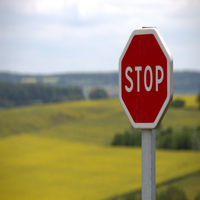

'#stop'


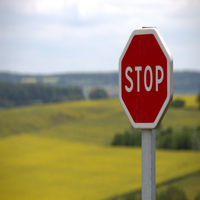

'#stop'


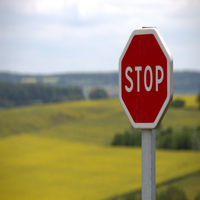

In [ ]:
PEXELS_API_KEY = 'hUGglhXJjJpePpS0Dmbqhr54IEhx074kSwyc3nmlq1GuxgTF4hQ1SiEM' #api key obtained from PEXELS
api = API(PEXELS_API_KEY) #creates an instance of the API class from the Pexels API Python wrapper library, passing in the API key as a parameter

for x in range(len(hashtagsGenerated)):
  api.search("stop", page=1, results_per_page=1) #makes a search request to the Pexels API for photos matching the current word in the loop, with a page number of 1 and a results per page of 1. This will return a list of photo objects matching the search criteria
  photos = api.get_entries() #retrieves the list of photo objects returned by the API search request
  for photo in photos:
      #print('Photographer: ', photo.photographer)
      #print('Photo url: ', photo.url)
      print(hashtagsGenerated[1][0]) #prints hashtags
      response = requests.get(photo.original, stream=True) #makes an HTTP GET request to download the original version of the current photo object, which is specified by the original attribute of the photo object
      with open('img.png', 'wb') as out_file: #opens a file named "img.png" in write binary mode, which will be used to store the downloaded image
          shutil.copyfileobj(response.raw, out_file) # copies the raw binary data from the HTTP response to the file "img.png"
      del response #to free up memory
      img = Image.open('img.png')
      # Resize the image to a smaller size (e.g., 500x500 pixels)
      img = img.resize((200, 200))
      # Save the resized image to a file
      img.save('resized_img.png')
     
      # Display the resized image
      img.show()
